# Lab 5

## lecture 5 

In [2]:
library('MASS')
data(Boston)

we can build a couple of models

In [3]:
mod1 = lm(medv~crim,data=Boston)
mod2 = lm(medv~crim+rm,data=Boston)
mod3 = lm(medv~crim+I(crim^2)+rm,data=Boston)

In [4]:
summary(mod1)$r.squared

[1] 0.1507805

In [5]:
summary(mod2)$r.squared

[1] 0.5419592

In [6]:
summary(mod3)$r.squared

[1] 0.553894

We should be carebul because we are always going to increase the $R^2$ if I add covariates. (This happens for other metrics too.) This is bad way of choosing which coviariates to include. 

# KNN

In [7]:
library('FNN')
?knn.reg

knn.reg {FNN},R Documentation
train,matrix or data frame of training set cases.
test,"matrix or data frame of test set cases. A vector will be interpreted as a row vector for a single case. If not supplied, cross-validataion will be done."
y,reponse of each observation in the training set.
k,number of neighbours considered.
algorithm,nearest neighbor search algorithm.
call,the match call.
k,number of neighbours considered.
n,"number of predicted values, either equals test size or train size."
pred,a vector of predicted values.
residuals,predicted residuals. NULL if test is supplied.


In [16]:
x = array(sort(runif(100,-1,1)),c(100,1))
head(x)

-0.9941781
-0.9917509
-0.9753652
-0.9550714
-0.9501908
-0.9497362


In [12]:
y = x^2 + rnorm(100,0,1/5)

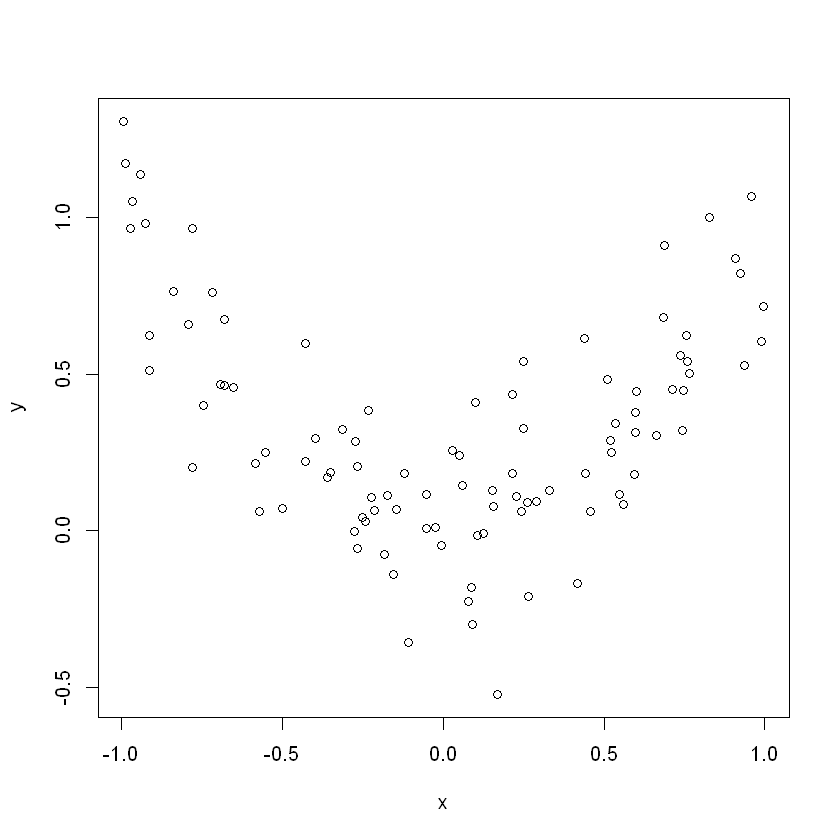

In [13]:
plot(x,y)

let's split the data into testing and training

In [18]:
train_ss = sample(nrow(x),floor(nrow(x)/2))
test_ss = setdiff(1:nrow(x),train_ss)

[1]  1  5  6  8 10 12 14 15 17 19 20 22 23 24 27 28 29 31 32 33 36 37 41 43 46
[26] 48 51 52 54 55 56 57 58 59 61 63 69 71 72 74 75 80 81 82 84 85 89 90 94 98

In [71]:
trainx = x[train_ss,,drop=FALSE]
testx = x[test_ss,,drop=FALSE]
trainy = y[train_ss,,drop=FALSE]
testy = y[test_ss,,drop=FALSE]

evaluate = function(pred_x,pred_y,K=10){
    knn_mod = knn.reg(train=trainx,test=pred_x,y=trainy,k=K)
    RSS = sum((knn_mod$pred - pred_y)^2)
    return(RSS)
}

In [72]:
evaluate(testx,testy)

[1] 3.422288

In [73]:
evaluate(trainx,trainy)

[1] 1.919579

How should we choose $K$?

In [74]:
K_seq = seq(1,46,2)
K_seq

[1]  1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45

In [75]:
train_RSSs = sapply(K_seq,function(K)evaluate(trainx,trainy,K=K))

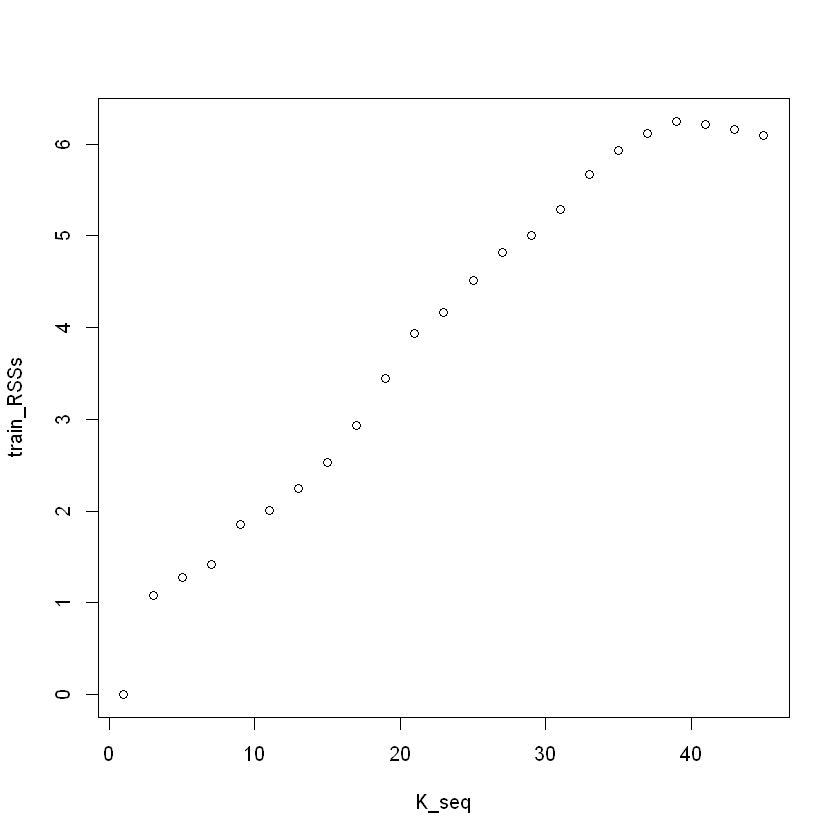

In [77]:
plot(K_seq,train_RSSs)

In [81]:
evaluate(trainx,trainy,1)

[1] 0

In [82]:
evaluate(testx,testy,1)

[1] 3.993131

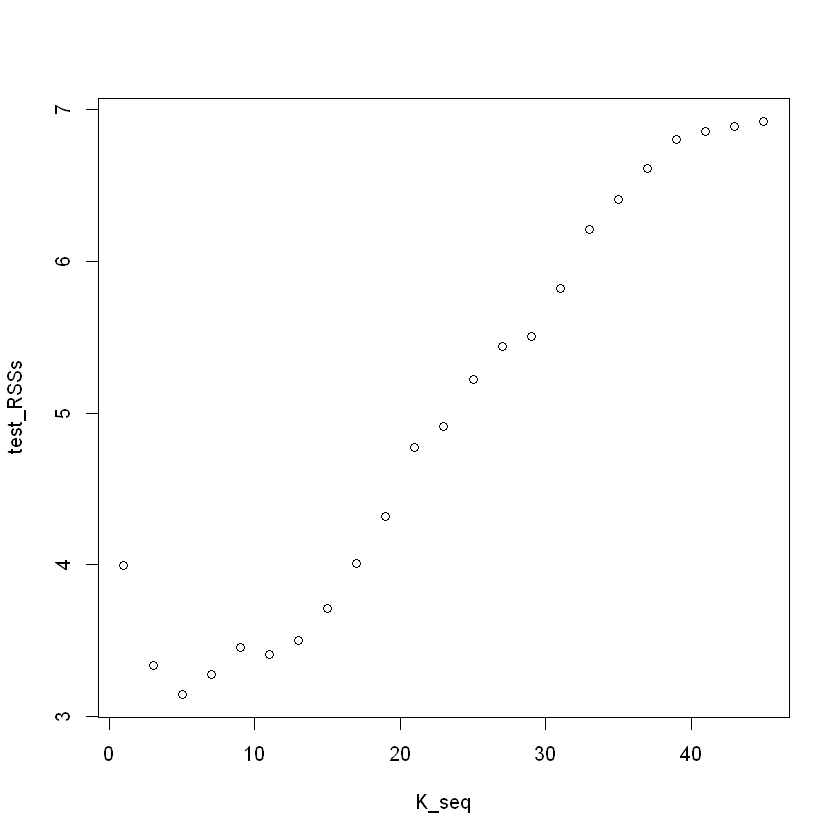

In [83]:
test_RSSs = sapply(K_seq,function(K)evaluate(testx,testy,K=K))
plot(K_seq,test_RSSs)

In [84]:
K_hat = K_seq[which.min(test_RSSs)]
K_hat

[1] 5

In [85]:
best_knn = knn.reg(train=trainx,test=testx,y=trainy,k=K_hat)

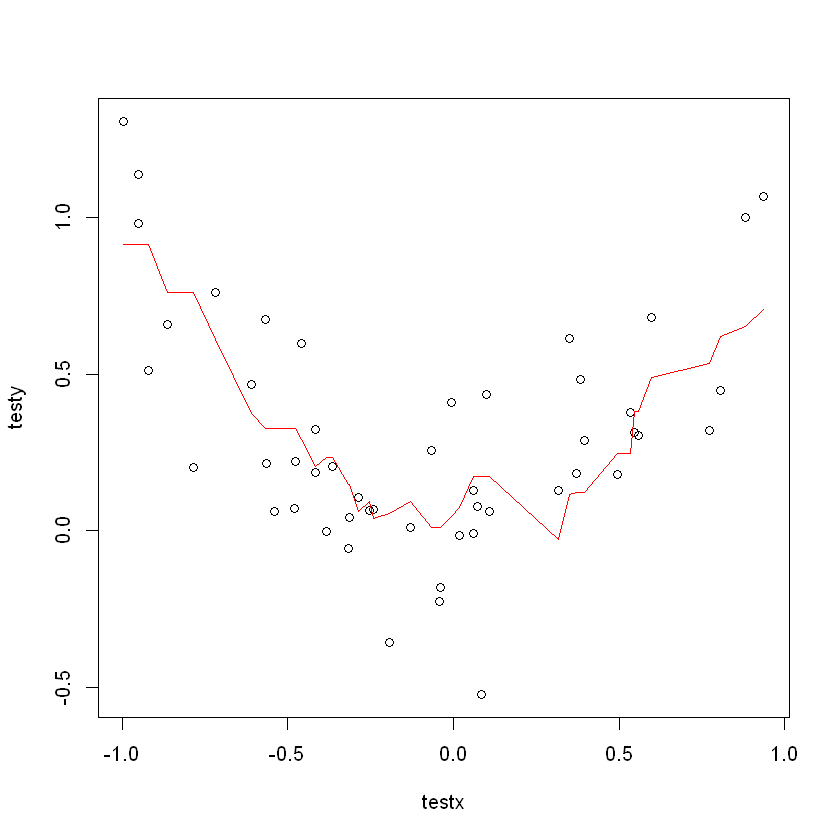

In [88]:
plot(testx,testy)
lines(testx,best_knn$pred,col='red')